In [2]:
from fit.datamodules.super_res.SRecDataModule import CelebASResFourierTargetDataModule
from fit.utils import convert2FC, fft_interpolate, psfft, convert_to_dft, PSNR
from fit.utils.tomo_utils import get_proj_coords_pol, get_img_coords_pol

from matplotlib import pyplot as plt

import torch

import numpy as np

from skimage.transform import iradon

from fit.utils.utils import denormalize

In [3]:
batch_size = 4
img_shape = 63
inner_circle = True

In [6]:
dm = CelebASResFourierTargetDataModule(root_dir='/data/celeb/', batch_size=batch_size)
dm.setup()

In [14]:
data = np.load('/data/celeb/gt_data.npz')

In [16]:
list(data.keys())

['gt_train', 'gt_val', 'gt_test']

In [17]:
data['gt_train'].shape

(20000, 63, 63)

In [18]:
data['gt_val'].shape

(5000, 63, 63)

In [19]:
data['gt_test'].shape

(5000, 63, 63)

In [7]:
train_dl = dm.train_dataloader()

In [8]:
for img in train_dl.dataset.ds:
    break

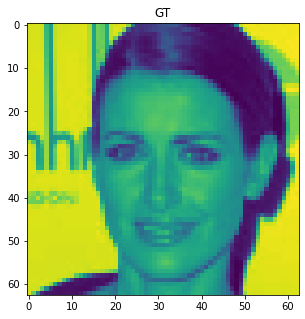

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title('GT');

In [8]:
# x and y are normalized magnitude and angle of the Fourier coefficients
for x, (mag_min, mag_max) in train_dl:
    break

In [9]:
# We have to convert angle and magnitude back to Fourier coefficients
full_fc = convert2FC(x, mag_min, mag_max)

In [10]:
full_fc = full_fc.reshape(4, 63, -1)

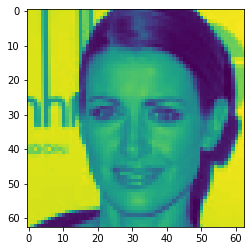

In [11]:
plt.imshow(torch.fft.irfftn(full_fc[0], s=(63,63)))